# Kaggle 'Predict Online Gaming Behavior Dataset'.

#### Feature Description
PlayerID: Unique identifier for each player.

Age: Age of the player.

Gender: Gender of the player.

Location: Geographic location of the player.

GameGenre: Genre of the game the player is engaged in.

PlayTimeHours: Average hours spent playing per session.

InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).

GameDifficulty: Difficulty level of the game.

SessionsPerWeek: Number of gaming sessions per week.

AvgSessionDurationMinutes: Average duration of each gaming session in minutes.

PlayerLevel: Current level of the player in the game.

AchievementsUnlocked: Number of achievements unlocked by the player.

EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

#### Target Variable:

EngagementLevel: Indicates the level of player engagement categorized as 'High', 'Medium', or 'Low'.

#### Added columns:

PlayTimeCategory - grouped column 'PlayTimeHours' ('Less than 5 hours','More than 5 hours, but less than 10','More than 10 hours, but less than 15', 'More than 15 hours, but less than 20', 'More than 20 hours, but less than 25')

AgeGroup - grouped column 'Age' ('15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-50')

In [22]:
# disable warnings Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

## Read the training sample

In [24]:
train_df = pd.read_csv("online_gaming_behavior_dataset.csv")

In [25]:
train_df.head(10)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


# Data Cleanup
### Tasks: Deleting rows using NaN, make sure that the columns have the correct data type.

In [26]:
train_df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [28]:
train_df.describe(include='all')

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034,40034,40034,40034.000000,40034.000000,40034,40034.000000,40034.000000,40034.000000,40034.000000,40034
unique,NaN,NaN,2,4,5,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,USA,Sports,NaN,NaN,Easy,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,23959,16000,8048,NaN,NaN,20015,NaN,NaN,NaN,NaN,19374
mean,29016.500000,31.992531,NaN,NaN,NaN,12.024365,0.200854,NaN,9.471774,94.792252,49.655568,24.526477,NaN
std,11556.964675,10.043227,NaN,NaN,NaN,6.914638,0.400644,NaN,5.763667,49.011375,28.588379,14.430726,NaN
min,9000.000000,15.000000,NaN,NaN,NaN,0.000115,0.000000,NaN,0.000000,10.000000,1.000000,0.000000,NaN
25%,19008.250000,23.000000,NaN,NaN,NaN,6.067501,0.000000,NaN,4.000000,52.000000,25.000000,12.000000,NaN
50%,29016.500000,32.000000,NaN,NaN,NaN,12.008002,0.000000,NaN,9.000000,95.000000,49.000000,25.000000,NaN
75%,39024.750000,41.000000,NaN,NaN,NaN,17.963831,0.000000,NaN,14.000000,137.000000,74.000000,37.000000,NaN


In [29]:
pd.isnull(train_df['Age']).sum()

0

### The dataframe does not require cleaning, the columns have the correct data type

# Primary data analysis

#### How many males and females are playing video games?

In [30]:
print('Male:', sum(train_df['Gender'] == 'Male'), 'Female:', sum(train_df['Gender'] == 'Female'))
a = sum(train_df['Gender'] == 'Male')
b = sum(train_df['Gender'] == 'Female')
print('The difference in the number of men and women playing video games: ', a-b)
percentage_male = (a / len(train_df)) * 100
percentage_female = (b / len(train_df)) * 100
print('Percentage of male playing video games: ', str(round(percentage_male, 2)) + "%")
print('Percentage of female playing video games: ', str(round(percentage_female, 2)) + "%")

Male: 23959 Female: 16075
The difference in the number of men and women playing video games:  7884
Percentage of male playing video games:  59.85%
Percentage of female playing video games:  40.15%


#### How many people playing different game genres?

In [31]:
print('Strategy:', sum(train_df['GameGenre'] == 'Strategy'), 'Simulation:', sum(train_df['GameGenre'] == 'Simulation'),'Sports:', sum(train_df['GameGenre'] == 'Sports'),'RPG:', sum(train_df['GameGenre'] == 'RPG'),'Action:', sum(train_df['GameGenre'] == 'Action'))

Strategy: 8012 Simulation: 7983 Sports: 8048 RPG: 7952 Action: 8039


#### How many people playing each game difficulty mode?

In [32]:
print('Easy:', sum(train_df['GameDifficulty'] == 'Easy'), 'Medium:', sum(train_df['GameDifficulty'] == 'Medium'),'Hard:', sum(train_df['GameDifficulty'] == 'Hard'))
easy_percentage = (sum(train_df['GameDifficulty'] == 'Easy') / len(train_df)) * 100
medium_percentage = (sum(train_df['GameDifficulty'] == 'Medium') / len(train_df)) * 100
hard_percentage = (sum(train_df['GameDifficulty'] == 'Hard') / len(train_df)) * 100
print('Percentage of players selecting Easy: ', str(round(easy_percentage, 2)) + "%")
print('Percentage of players selecting Medium: ', str(round(medium_percentage, 2)) + "%")
print('Percentage of players selecting Hard: ', str(round(hard_percentage, 2)) + "%")

Easy: 20015 Medium: 12011 Hard: 8008
Percentage of players selecting Easy:  50.0%
Percentage of players selecting Medium:  30.0%
Percentage of players selecting Hard:  20.0%


#### How many people are there with each level of engagement?

In [33]:
print('Low:', sum(train_df['EngagementLevel'] == 'Low'), 'Medium:', sum(train_df['EngagementLevel'] == 'Medium'),'High:', sum(train_df['EngagementLevel'] == 'High'))

Low: 10324 Medium: 19374 High: 10336


#### How many people have shopped in games? What is the percentage of people who have not made purchases?

In [34]:
total_sum = train_df['InGamePurchases'].sum()
print("Sum of InGamePurchases:", total_sum)

zero_count = (train_df['InGamePurchases'] == 0).sum()
print("Count of zeros in InGamePurchases:", zero_count)

total_rows = len(train_df)

zero_percentage = (zero_count / total_rows) * 100
print("Percentage of zeros in InGamePurchases: " + str(round(zero_percentage, 2)) + "%")

Sum of InGamePurchases: 8041
Count of zeros in InGamePurchases: 31993
Percentage of zeros in InGamePurchases: 79.91%


In [35]:
train_df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


## Data analysis with visualization

### How many men and women of different ages play video games? (+ mean value, median, standard deviation)

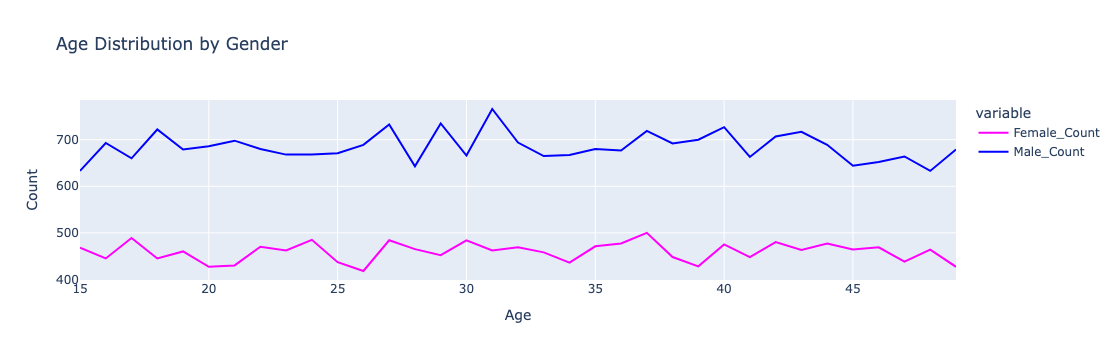

Age median:  32.0
Age standard deviation 8.683697004870632
Age Mean 31.9925313483539


In [36]:
import plotly.express as px
import pandas as pd

age_counts = train_df['Age'].value_counts().sort_index().reset_index()
age_counts.columns = ['Age', 'Count']

filtered_female_df = train_df[train_df['Gender'] == 'Female']
female_age_counts = filtered_female_df['Age'].value_counts().sort_index().reset_index()
female_age_counts.columns = ['Age', 'Female_Count']

filtered_male_df = train_df[train_df['Gender'] == 'Male']
male_age_counts = filtered_male_df['Age'].value_counts().sort_index().reset_index()
male_age_counts.columns = ['Age', 'Male_Count']

age_gender_counts = pd.merge(age_counts, female_age_counts, on='Age', how='left')
age_gender_counts = pd.merge(age_gender_counts, male_age_counts, on='Age', how='left')

age_gender_counts = age_gender_counts.fillna(0)

fig = px.line(age_gender_counts, x="Age", y=["Female_Count", "Male_Count"], 
              title="Age Distribution by Gender",
              labels={"Age": "Age", "value": "Count"},
              markers=False,
              color_discrete_map={"Female_Count": "fuchsia", "Male_Count": "blue"})

fig.show()
print('Age median: ', train_df['Age'].median())
print('Age standard deviation', train_df['Age'].mad())
print('Age Mean', train_df['Age'].mean())

### Which regions do they mostly play from?

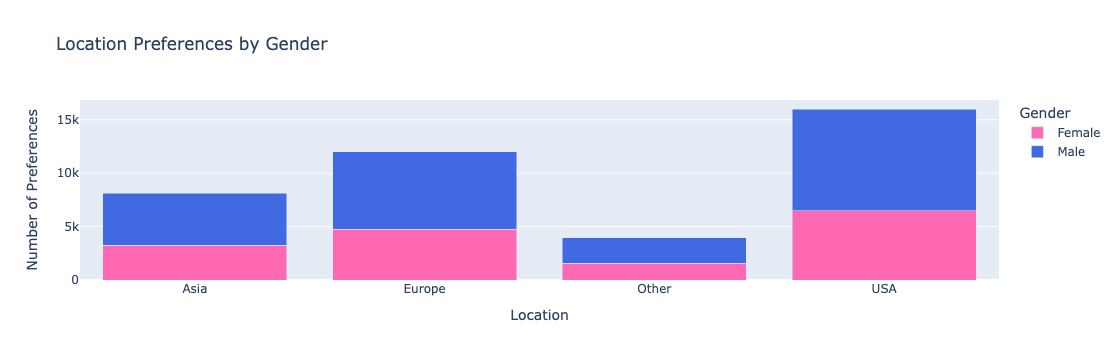

Both
USA       16000
Europe    12004
Asia       8095
Other      3935
------------
Male location
USA       9518
Europe    7242
Asia      4844
Other     2355
-------------
Female location
USA       6482
Europe    4762
Asia      3251
Other     1580


In [37]:
import pandas as pd
import plotly.express as px
location_counts = train_df.groupby(['Location', 'Gender']).size().reset_index(name='Count')

fig = px.bar(location_counts, x='Location', y='Count', color='Gender', 
             title="Location Preferences by Gender",
             labels={'Location': 'Location', 'Count': 'Number of Preferences'},
             barmode='stack', 
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Both')
value_counts = train_df['Location'].value_counts()
print(value_counts.to_string())
print('------------')

print('Male location')
condition_1 = train_df['Gender'] == 'Male'
filtered_df = train_df[condition_1]
value_counts = filtered_df['Location'].value_counts()
print(value_counts.to_string())
print('-------------')

print('Female location')
condition_1 = train_df['Gender'] == 'Female'
filtered_df = train_df[condition_1]
value_counts = filtered_df['Location'].value_counts()
print(value_counts.to_string())

### Game genre preferences by gender

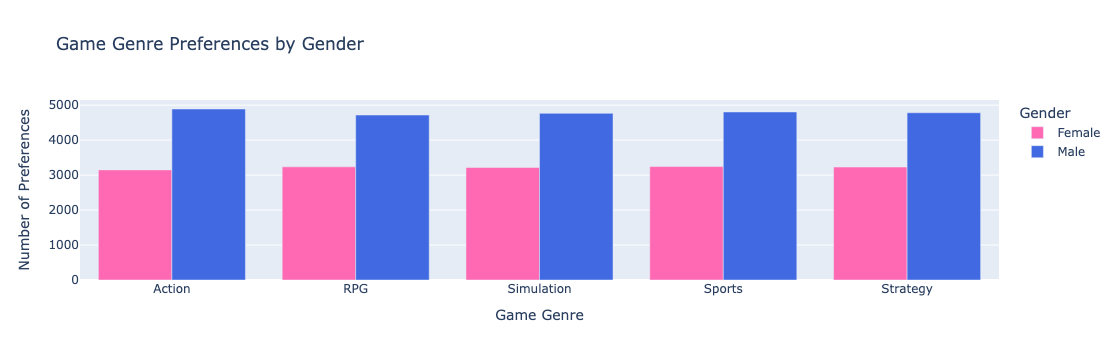

Both
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
------------
Male game genre preferences
Action        4890
Sports        4805
Strategy      4782
Simulation    4765
RPG           4717
-------------
Female game genre preferences
Sports        3243
RPG           3235
Strategy      3230
Simulation    3218
Action        3149


In [38]:
import pandas as pd
import plotly.express as px
game_genre_counts = train_df.groupby(['GameGenre', 'Gender']).size().reset_index(name='Count')

fig = px.bar(game_genre_counts, x='GameGenre', y='Count', color='Gender', 
             title="Game Genre Preferences by Gender",
             labels={'GameGenre': 'Game Genre', 'Count': 'Number of Preferences'},
             barmode='group',
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Both')
value_counts = train_df['GameGenre'].value_counts()
print(value_counts.to_string())
print('------------')

print('Male game genre preferences')
condition_1 = train_df['Gender'] == 'Male'
filtered_df = train_df[condition_1]
value_counts = filtered_df['GameGenre'].value_counts()
print(value_counts.to_string())
print('-------------')

print('Female game genre preferences')
condition_1 = train_df['Gender'] == 'Female'
filtered_df = train_df[condition_1]
value_counts = filtered_df['GameGenre'].value_counts()
print(value_counts.to_string())

## Playtime hours by gender (+ mean value, median, standard deviation)

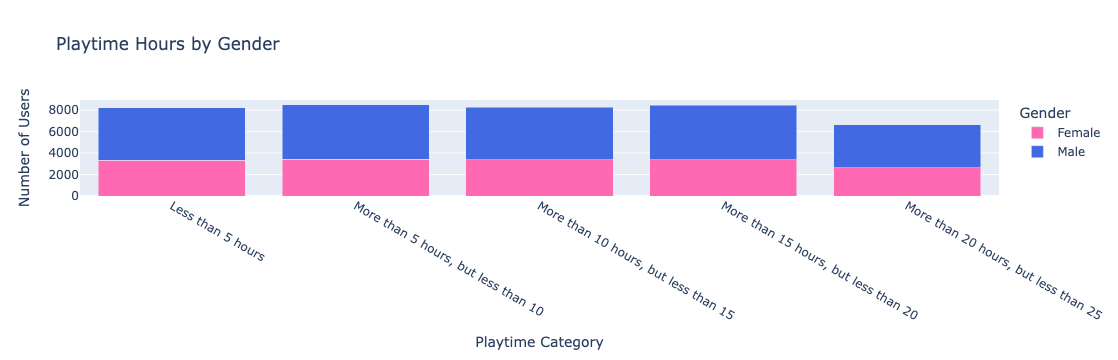

Playtime Hours median:  12.00800215801307
Playtime Hours standard deviation 5.988907742735561
Playtime Hours Mean 12.024365373325825
Both
Less than 5 hours: 8219
More than 5 hours, but less than 10: 8481
More than 10 hours, but less than 15: 8270
More than 15 hours, but less than 20: 8428
More than 20 hours, but less than 25: 6636
------------
Male Play Time Hours
Less than 5 hours: 4903
More than 5 hours, but less than 10: 5059
More than 10 hours, but less than 15: 4910
More than 15 hours, but less than 20: 5060
More than 20 hours, but less than 25: 4027
-------------
Female Play Time Hours
Less than 5 hours: 3316
More than 5 hours, but less than 10: 3422
More than 10 hours, but less than 15: 3360
More than 15 hours, but less than 20: 3368
More than 20 hours, but less than 25: 2609


In [48]:
import pandas as pd
import plotly.express as px

bins = [0, 5, 10, 15, 20, 25]
labels = ['Less than 5 hours', 'More than 5 hours, but less than 10',
          'More than 10 hours, but less than 15', 'More than 15 hours, but less than 20',
          'More than 20 hours, but less than 25']

train_df['PlayTimeCategory'] = pd.cut(train_df['PlayTimeHours'], bins=bins, labels=labels, right=False)

playtime_counts = train_df.groupby(['PlayTimeCategory', 'Gender']).size().reset_index(name='Count')

fig = px.bar(playtime_counts, 
             x='PlayTimeCategory', 
             y='Count', 
             color='Gender', 
             title="Playtime Hours by Gender",
             labels={'PlayTimeCategory': 'Playtime Category', 'Count': 'Number of Users'},
             barmode='stack', 
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Playtime Hours median: ', train_df['PlayTimeHours'].median())
print('Playtime Hours standard deviation', train_df['PlayTimeHours'].mad())
print('Playtime Hours Mean', train_df['PlayTimeHours'].mean())

print('Both')
for label in labels:
    count = train_df[train_df['PlayTimeCategory'] == label].shape[0]
    print(f'{label}: {count}')
print('------------')

print('Male Play Time Hours')
for label in labels:
    count = train_df[(train_df['PlayTimeCategory'] == label) & (train_df['Gender'] == 'Male')].shape[0]
    print(f'{label}: {count}')
print('-------------')

print('Female Play Time Hours')
for label in labels:
    count = train_df[(train_df['PlayTimeCategory'] == label) & (train_df['Gender'] == 'Female')].shape[0]
    print(f'{label}: {count}')


#### More players are in the "more than five, but less than 10" group.
#### The most numerous block for men is "More than 15 hours, but less than 20" and its value is 5060, 
#### while for women is "More than 5 hours, but less than 10" the value is 3422.
#### From this we can conclude that men play more

## In-game purchares by gender

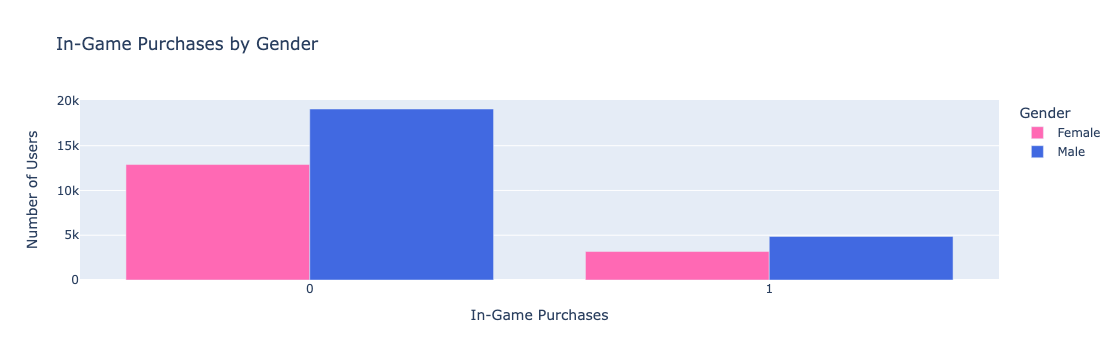

Both
0    31993
1     8041
------------
Female InGamePurchases
0    12895
1     3180
Percentage of females who made purchases: 19.78 %
-------------
Male InGamePurchases
0    19098
1     4861
Percentage of males who made purchases: 20.29 %


In [40]:
import pandas as pd
import plotly.express as px

purchase_counts = train_df.groupby(['InGamePurchases', 'Gender']).size().reset_index(name='Count')

fig = px.bar(purchase_counts, 
             x='InGamePurchases', 
             y='Count', 
             color='Gender', 
             title="In-Game Purchases by Gender",
             labels={'InGamePurchases': 'In-Game Purchases', 'Count': 'Number of Users'},
             barmode='group', 
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Both')
value_counts = train_df['InGamePurchases'].value_counts()
print(value_counts.to_string())
print('------------')

print('Female InGamePurchases')
condition_female = train_df['Gender'] == 'Female'
filtered_female_df = train_df[condition_female]
female_value_counts = filtered_female_df['InGamePurchases'].value_counts()
print(female_value_counts.to_string())
total_females = len(filtered_female_df)
females_made_purchases = sum(filtered_female_df['InGamePurchases'] > 0)
female_purchase_percentage = (females_made_purchases / total_females) * 100
print('Percentage of females who made purchases:', round(female_purchase_percentage,2),'%')
print('-------------')

print('Male InGamePurchases')
condition_male = train_df['Gender'] == 'Male'
filtered_male_df = train_df[condition_male]
male_value_counts = filtered_male_df['InGamePurchases'].value_counts()
print(male_value_counts.to_string())

total_males = len(filtered_male_df)
males_made_purchases = sum(filtered_male_df['InGamePurchases'] > 0)
male_purchase_percentage = (males_made_purchases / total_males) * 100
print('Percentage of males who made purchases:', round(male_purchase_percentage,2),'%')

### So we can conclude that men are more likely to shop in games than women

## Game Difficulty Preferences by Gender

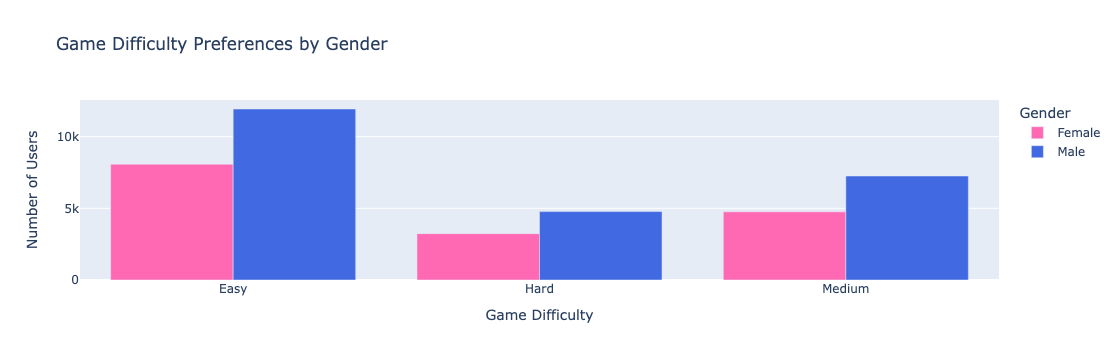

Both
Easy      20015
Medium    12011
Hard       8008
Percentage:
 Easy      49.995004
Medium    30.001998
Hard      20.002997
------------
Female preferences in game difficulty
Easy      8084
Medium    4757
Hard      3234
Female Percentage:
Easy      50.289269
Medium    29.592535
Hard      20.118196
-------------
Male preferences in game difficulty
Easy      11931
Medium     7254
Hard       4774
Male Percentage:
 Easy      49.797571
Medium    30.276723
Hard      19.925706


In [41]:
import pandas as pd
import plotly.express as px

difficulty_counts = train_df.groupby(['GameDifficulty', 'Gender']).size().reset_index(name='Count')

fig = px.bar(difficulty_counts, 
             x='GameDifficulty', 
             y='Count', 
             color='Gender', 
             title="Game Difficulty Preferences by Gender",
             labels={'GameDifficulty': 'Game Difficulty', 'Count': 'Number of Users'},
             barmode='group', 
             color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})
fig.show()

print('Both')
value_counts = train_df['GameDifficulty'].value_counts()
total_count = value_counts.sum()
print(value_counts.to_string())

value_percentage = (value_counts / total_count) * 100
print("Percentage:\n", value_percentage.to_string())
print('------------')

print('Female preferences in game difficulty')
condition_female = train_df['Gender'] == 'Female'
filtered_female_df = train_df[condition_female]
female_value_counts = filtered_female_df['GameDifficulty'].value_counts()
female_total_count = female_value_counts.sum()
print(female_value_counts.to_string())

female_value_percentage = (female_value_counts / female_total_count) * 100
print("Female Percentage:\n" + female_value_percentage.to_string())
print('-------------')

print('Male preferences in game difficulty')
condition_male = train_df['Gender'] == 'Male'
filtered_male_df = train_df[condition_male]
male_value_counts = filtered_male_df['GameDifficulty'].value_counts()
male_total_count = male_value_counts.sum()
print(male_value_counts.to_string())

male_value_percentage = (male_value_counts / male_total_count) * 100
print("Male Percentage:\n", male_value_percentage.to_string())

General Observations:
Overall, the preferences for game difficulty are fairly balanced, with a slight tilt toward "Easy" and "Medium" difficulties:

Female Preferences:
Women lean slightly more toward the "Easy" difficulty (50.29%), compared to the overall average of 49.99%.
The preference for "Medium" difficulty among women is slightly lower than the overall average (29.59% vs. 30.00%).
Women also show a marginally higher inclination toward "Hard" difficulty (20.12%) compared to the overall group (20.00%).
Male Preferences:
Men show a slightly higher preference for "Medium" difficulty (30.28%) than the general population, which is in line with the overall trend but a little more pronounced.
Men prefer "Easy" difficulty at 49.80%, which is just slightly below the overall average (49.99%).
The preference for "Hard" difficulty among men is slightly lower (19.93%) compared to the overall group.
Key Takeaways:
The preference for "Easy" difficulty is consistently high for both genders, with a small difference between females (50.29%) and males (49.80%).
Both genders show similar preferences for "Hard" difficulty, with only a slight increase in the female group (20.12%) compared to males (19.93%).
The biggest difference between males and females is in the "Medium" category, where males have a higher preference (30.28%) compared to females (29.59%).
Conclusion:
The data suggests that both males and females prefer "Easy" or "Medium" difficulties, but males have a slightly stronger preference for "Medium" difficulty compared to females.
There is also little difference in preference for "Hard" difficulty across genders, though women show a marginally higher inclination toward it.
This indicates that while there are some slight variations, both male and female players generally favor more accessible game difficulties (Easy/Medium) over harder challenges.

## Sessions Per Week by Gender (+ mean value, median, standard deviation)

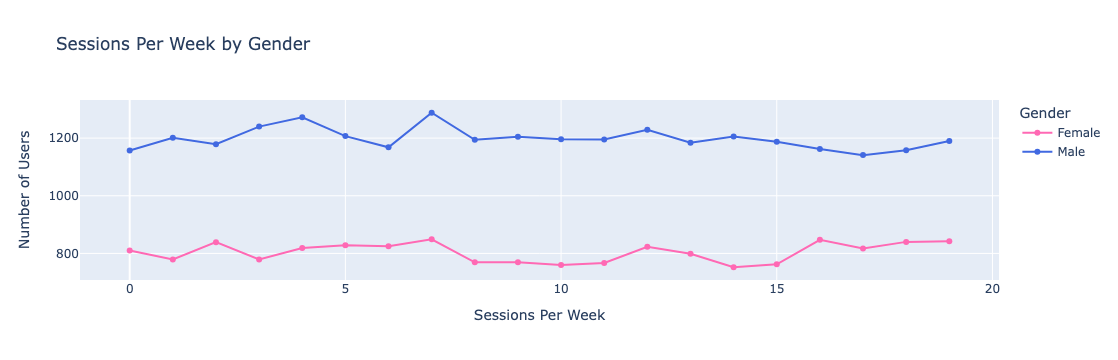

Sessions Per Week median:  9.0
Sessions Per Week standard deviation 5.001398003633764
Sessions Per Week Mean 9.471773992106709
    Both  Female  Male
0   1967     810  1157
1   1980     779  1201
2   2018     839  1179
3   2019     779  1240
4   2091     819  1272
5   2035     828  1207
6   1993     825  1168
7   2137     849  1288
8   1963     769  1194
9   1974     769  1205
10  1956     760  1196
11  1962     767  1195
12  2052     823  1229
13  1983     799  1184
14  1958     752  1206
15  1949     762  1187
16  2009     847  1162
17  1958     817  1141
18  1998     840  1158
19  2032     842  1190


In [54]:
import pandas as pd
import plotly.express as px
sessions_counts = train_df.groupby(['SessionsPerWeek', 'Gender']).size().reset_index(name='Count')

fig = px.line(sessions_counts, 
              x='SessionsPerWeek', 
              y='Count', 
              color='Gender', 
              title="Sessions Per Week by Gender",
              labels={'SessionsPerWeek': 'Sessions Per Week', 'Count': 'Number of Users'},
              markers=True, 
             color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Sessions Per Week median: ', train_df['SessionsPerWeek'].median())
print('Sessions Per Week standard deviation', train_df['SessionsPerWeek'].mad())
print('Sessions Per Week Mean', train_df['SessionsPerWeek'].mean())

both_counts = train_df['SessionsPerWeek'].value_counts().sort_index()
female_counts = train_df[train_df['Gender'] == 'Female']['SessionsPerWeek'].value_counts().sort_index()

male_counts = train_df[train_df['Gender'] == 'Male']['SessionsPerWeek'].value_counts().sort_index()

table = pd.DataFrame({
    'Both': both_counts,
    'Female': female_counts,
    'Male': male_counts
}).astype(int)

print(table)

Groups with maximum activity:
In the category with 7 sessions per week, 2,137 people have a total of 7 sessions per week, of which:
849 are women and 1288 are men. This is the largest group for both women and men.

## Average Session Duration (Minutes) by Gender  (+ mean value, median, standard deviation)

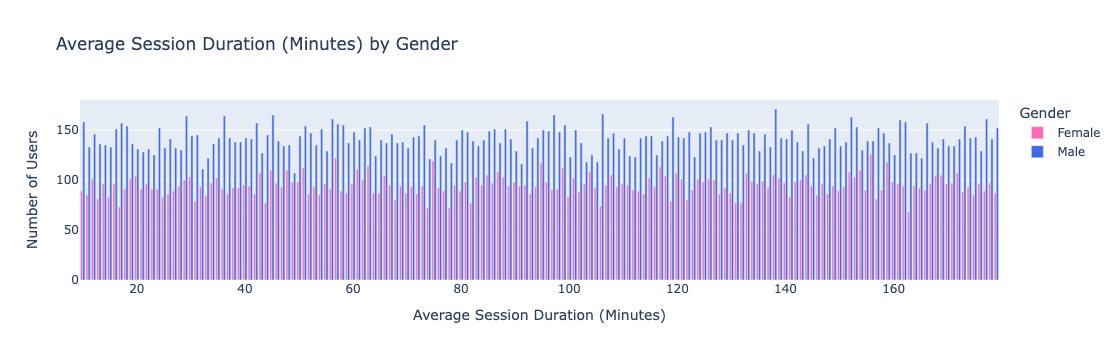

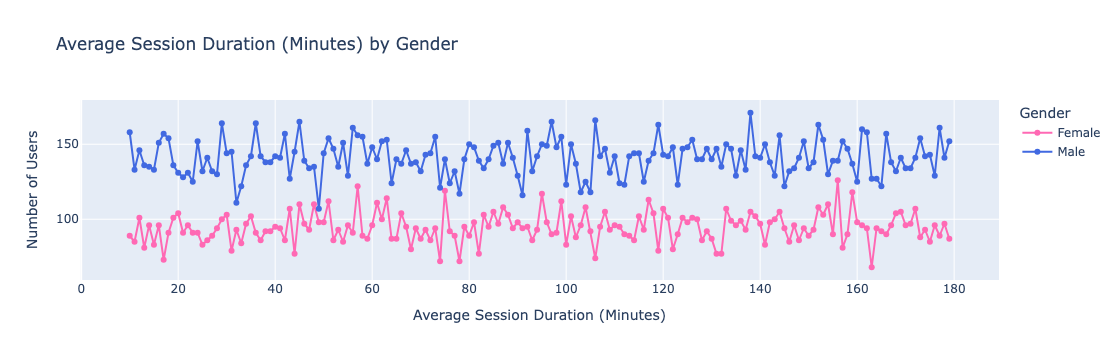

Average Session Duration median:  95.0
Average Session Duration standard deviation 42.44374430782144
Average Session Duration Mean 94.79225158615178
     Both  Female  Male
10    247      89   158
11    218      85   133
12    247     101   146
13    217      81   136
14    231      96   135
15    216      83   133
16    247      96   151
17    230      73   157
18    245      91   154
19    237     101   136
20    235     104   131
21    219      91   128
22    227      96   131
23    216      91   125
24    243      91   152
25    215      83   132
26    227      86   141
27    221      89   132
28    224      94   130
29    264     100   164
30    247     103   144
31    224      79   145
32    204      93   111
33    206      84   122
34    233      97   136
35    244     102   142
36    255      91   164
37    228      86   142
38    230      92   138
39    230      92   138
40    237      95   142
41    235      94   141
42    243      86   157
43    234     107   127
44    222  

In [53]:
import pandas as pd
import plotly.express as px

value_counts = train_df['AvgSessionDurationMinutes'].value_counts().sort_index()
condition_female = train_df['Gender'] == 'Female'
filtered_female_df = train_df[condition_female]
female_value_counts = filtered_female_df['AvgSessionDurationMinutes'].value_counts().sort_index()

condition_male = train_df['Gender'] == 'Male'
filtered_male_df = train_df[condition_male]
male_value_counts = filtered_male_df['AvgSessionDurationMinutes'].value_counts().sort_index()

session_duration_counts = train_df.groupby(['AvgSessionDurationMinutes', 'Gender']).size().reset_index(name='Count')

fig = px.bar(session_duration_counts, 
             x='AvgSessionDurationMinutes', 
             y='Count', 
             color='Gender', 
             title="Average Session Duration (Minutes) by Gender",
             labels={'AvgSessionDurationMinutes': 'Average Session Duration (Minutes)', 'Count': 'Number of Users'},
             barmode='group', 
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'}) 

fig.show()

session_duration_counts = train_df.groupby(['AvgSessionDurationMinutes', 'Gender']).size().reset_index(name='Count')
fig = px.line(session_duration_counts, 
              x='AvgSessionDurationMinutes', 
              y='Count', 
              color='Gender', 
              title="Average Session Duration (Minutes) by Gender",
              labels={'AvgSessionDurationMinutes': 'Average Session Duration (Minutes)', 'Count': 'Number of Users'},
              markers=True,
              color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})
fig.show()

print('Average Session Duration median: ', train_df['AvgSessionDurationMinutes'].median())
print('Average Session Duration standard deviation', train_df['AvgSessionDurationMinutes'].mad())
print('Average Session Duration Mean', train_df['AvgSessionDurationMinutes'].mean())

both_counts = train_df['AvgSessionDurationMinutes'].value_counts().sort_index()
female_counts = train_df[train_df['Gender'] == 'Female']['AvgSessionDurationMinutes'].value_counts().sort_index()
male_counts = train_df[train_df['Gender'] == 'Male']['AvgSessionDurationMinutes'].value_counts().sort_index()
table = pd.DataFrame({
    'Both': both_counts,
    'Female': female_counts,
    'Male': male_counts
}).astype(int)
print(table.to_string())

## Player Level Distribution by Gender

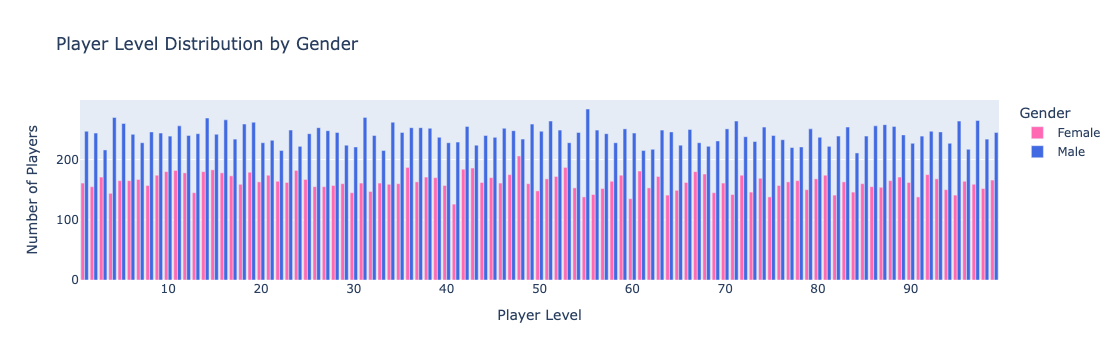

Both
1     408
2     399
3     387
4     414
5     425
6     407
7     395
8     403
9     418
10    419
11    438
12    418
13    388
14    449
15    425
16    444
17    407
18    418
19    441
20    391
21    406
22    379
23    411
24    404
25    410
26    408
27    403
28    402
29    384
30    366
31    431
32    387
33    376
34    421
35    405
36    440
37    416
38    423
39    407
40    385
41    355
42    439
43    410
44    402
45    407
46    413
47    423
48    440
49    419
50    395
51    432
52    421
53    415
54    398
55    422
56    391
57    395
58    392
59    425
60    379
61    396
62    370
63    421
64    387
65    373
66    412
67    408
68    398
69    376
70    412
71    406
72    412
73    376
74    423
75    378
76    390
77    383
78    386
79    401
80    405
81    396
82    380
83    417
84    357
85    399
86    411
87    412
88    420
89    412
90    389
91    377
92    422
93    414
94    377
95    405
96    381
97    424
98    386
99    411
None


In [44]:
import pandas as pd
import plotly.express as px

player_level_counts = train_df.groupby(['PlayerLevel', 'Gender']).size().reset_index(name='Count')

fig = px.bar(player_level_counts, 
             x='PlayerLevel', 
             y='Count', 
             color='Gender', 
             title="Player Level Distribution by Gender",
             labels={'PlayerLevel': 'Player Level', 'Count': 'Number of Players'},
             barmode='group',
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()
print('Both')
value_counts = train_df['PlayerLevel'].value_counts().sort_index()
print(print(value_counts.to_string()))
print('------------')
print('Female PlayerLevel')
condition_1 = train_df['Gender'] == 'Female'
filtered_df = train_df[condition_1]
value_counts = filtered_df['PlayerLevel'].value_counts().sort_index()
print(value_counts.to_string())
print('-------------')
print('Male PlayerLevel')
condition_1 = train_df['Gender'] == 'Male'
filtered_df = train_df[condition_1]
value_counts = filtered_df['PlayerLevel'].value_counts().sort_index()
print(value_counts.to_string())

## Achievements Unlocked Distribution by Gender

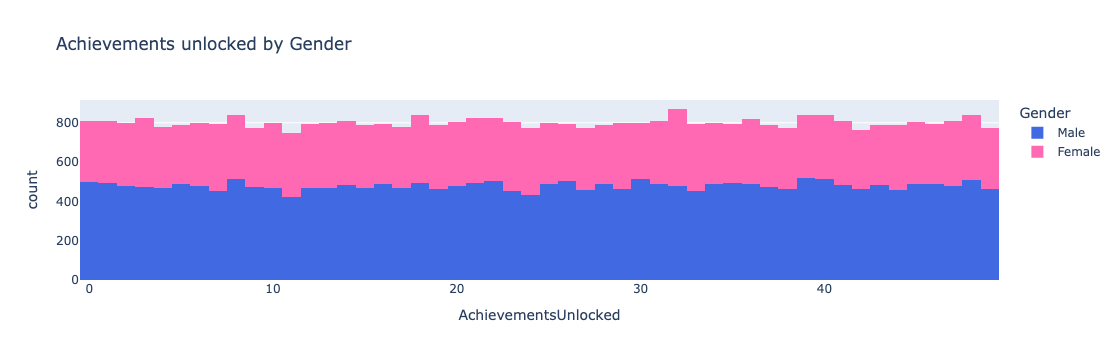

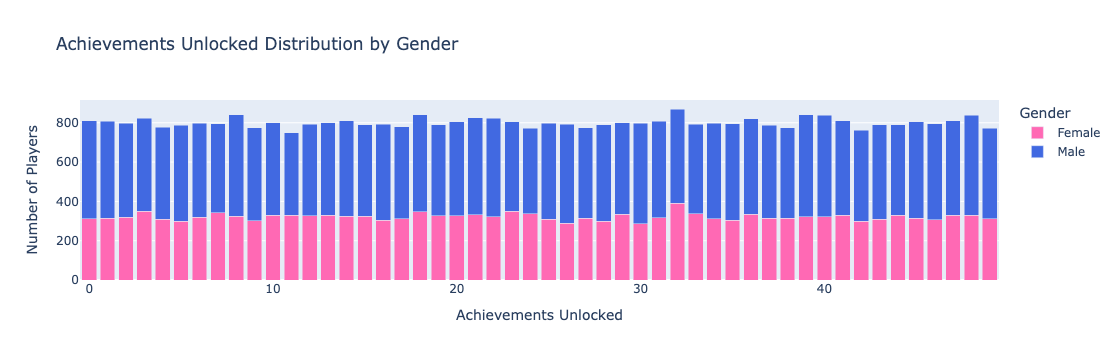

Both
0     810
1     807
2     798
3     823
4     777
5     788
6     798
7     794
8     840
9     775
10    800
11    750
12    793
13    800
14    809
15    790
16    793
17    780
18    842
19    790
20    806
21    825
22    824
23    805
24    771
25    797
26    793
27    774
28    789
29    799
30    797
31    807
32    870
33    793
34    798
35    796
36    821
37    788
38    774
39    842
40    837
41    811
42    762
43    790
44    790
45    805
46    794
47    809
48    837
49    773
------------
Female AchievementsUnlocked
0     312
1     313
2     320
3     350
4     309
5     300
6     319
7     342
8     325
9     302
10    330
11    329
12    326
13    330
14    325
15    324
16    303
17    312
18    346
19    326
20    327
21    333
22    322
23    351
24    338
25    309
26    289
27    315
28    299
29    334
30    285
31    318
32    391
33    338
34    312
35    303
36    334
37    315
38    313
39    322
40    323
41    330
42    300
43    308
44    330
45  

In [21]:
import pandas as pd
import plotly.express as px

fig = px.histogram(train_df, x="AchievementsUnlocked", color="Gender", title="Achievements unlocked by Gender", color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})
fig.show()

achievement_counts = train_df.groupby(['AchievementsUnlocked', 'Gender']).size().reset_index(name='Count')

fig = px.bar(achievement_counts, 
             x='AchievementsUnlocked', 
             y='Count', 
             color='Gender', 
             title="Achievements Unlocked Distribution by Gender",
             labels={'AchievementsUnlocked': 'Achievements Unlocked', 'Count': 'Number of Players'},
             barmode='stack',color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()
print('Both')
value_counts = train_df['AchievementsUnlocked'].value_counts().sort_index()
print(value_counts.to_string())
print('------------')
print('Female AchievementsUnlocked')
condition_1 = train_df['Gender'] == 'Female'
filtered_df = train_df[condition_1]
value_counts = filtered_df['AchievementsUnlocked'].value_counts().sort_index()
print(value_counts.to_string())
print('-------------')
print('Male AchievementsUnlocked')
condition_1 = train_df['Gender'] == 'Male'
filtered_df = train_df[condition_1]
value_counts = filtered_df['AchievementsUnlocked'].value_counts().sort_index()
print(value_counts.to_string())

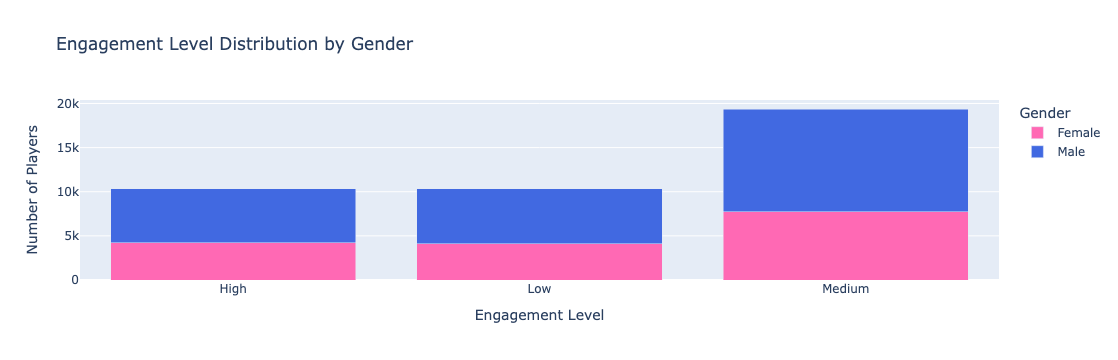

Both
Medium    19374
High      10336
Low       10324
None
------------
Female EngagementLevel
Medium    7758
High      4196
Low       4121
-------------
Male EngagementLevel
Medium    11616
Low        6203
High       6140


In [34]:
import pandas as pd
import plotly.express as px

engagement_counts = train_df.groupby(['EngagementLevel', 'Gender']).size().reset_index(name='Count')

fig = px.bar(engagement_counts, 
             x='EngagementLevel', 
             y='Count', 
             color='Gender', 
             title="Engagement Level Distribution by Gender",
             labels={'EngagementLevel': 'Engagement Level', 'Count': 'Number of Players'},
             barmode='stack', color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

print('Both')
value_counts = train_df['EngagementLevel'].value_counts()
print(print(value_counts.to_string()))
print('------------')
print('Female EngagementLevel')
condition_1 = train_df['Gender'] == 'Female'
filtered_df = train_df[condition_1]
value_counts = filtered_df['EngagementLevel'].value_counts()
print(value_counts.to_string())
print('-------------')
print('Male EngagementLevel')
condition_1 = train_df['Gender'] == 'Male'
filtered_df = train_df[condition_1]
value_counts = filtered_df['EngagementLevel'].value_counts()
print(value_counts.to_string())

гипотеза 10

In [10]:
import pandas as pd

achievements_by_gender = train_df.groupby('Gender')['AchievementsUnlocked'].sum()

print(achievements_by_gender)

count_by_gender = train_df.groupby('Gender')['AchievementsUnlocked'].count()
mean_achievements_by_gender = train_df.groupby('Gender')['AchievementsUnlocked'].mean()

table = pd.DataFrame({
    'Number of players': count_by_gender,
    'Average number of achievements': mean_achievements_by_gender,
    'Total number of achievements': achievements_by_gender})

print(table)

Gender
Female    393195
Male      588698
Name: AchievementsUnlocked, dtype: int64
        Number of players  Average number of achievements  \
Gender                                                      
Female              16075                       24.460031   
Male                23959                       24.571059   

        Total number of achievements  
Gender                                
Female                        393195  
Male                          588698  


# Hypotheses

## 1. The influence of the age and level of the player on the propensity to buy in the game

#### Initially, I assumed that teenagers or people about forty years old with a small level would make purchases in games to accelerate progress in the game

In [36]:
import pandas as pd

df_filtered = train_df[['Age', 'PlayerLevel', 'InGamePurchases']].dropna()

age_level_stats = df_filtered.groupby(['Age', 'PlayerLevel'])['InGamePurchases'].mean().reset_index()

print("The average probability of purchase depends on the age and level of the player:")

print(age_level_stats)

The average probability of purchase depends on the age and level of the player:
      Age  PlayerLevel  InGamePurchases
0      15            1         0.125000
1      15            2         0.230769
2      15            3         0.250000
3      15            4         0.300000
4      15            5         0.266667
...   ...          ...              ...
3460   49           95         0.210526
3461   49           96         0.125000
3462   49           97         0.200000
3463   49           98         0.111111
3464   49           99         0.200000

[3465 rows x 3 columns]


The maximum probability of purchase: 0.8333333333333334
The age of the player with the highest probability of purchase: 38.0
The player's level with the highest probability of purchase: 92.0


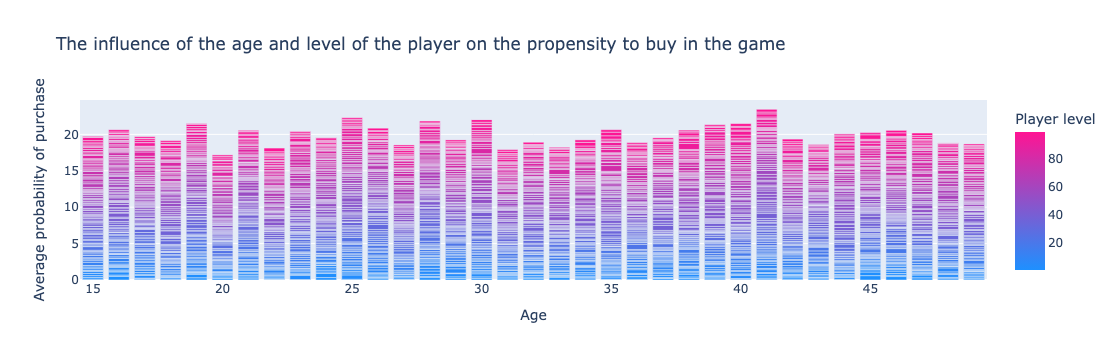

In [37]:
import plotly.express as px
import pandas as pd

max_purchase = age_level_stats.loc[age_level_stats['InGamePurchases'].idxmax()]

max_prob = max_purchase['InGamePurchases']
age_at_max_prob = max_purchase['Age']
level_at_max_prob = max_purchase['PlayerLevel']

print(f"The maximum probability of purchase: {max_prob}")
print(f"The age of the player with the highest probability of purchase: {age_at_max_prob}")
print(f"The player's level with the highest probability of purchase: {level_at_max_prob}")

custom_colorscale = ['#1E90FF', '#FF1493']
fig = px.bar(age_level_stats,
             x="Age", 
             y="InGamePurchases", 
             color="PlayerLevel", 
             barmode="group",
             labels={"InGamePurchases": "Average probability of purchase", "Age": "Age", "PlayerLevel": "Player level"},
             title="The influence of the age and level of the player on the propensity to buy in the game",
            color_continuous_scale = custom_colorscale)
fig.show()

#### After analyzing the dataset and building a visual graph, turned out that the highest probability of buying is from people 38 years old with 99 levels of the game (quite high)

## 2. Average engagement depending on the player's level

#### Initially, I assumed that people at the initial levels of the game would be most involved in the games

Maximum average engagement: 2.1209876543209876
The level of the player with maximum engagement: 80


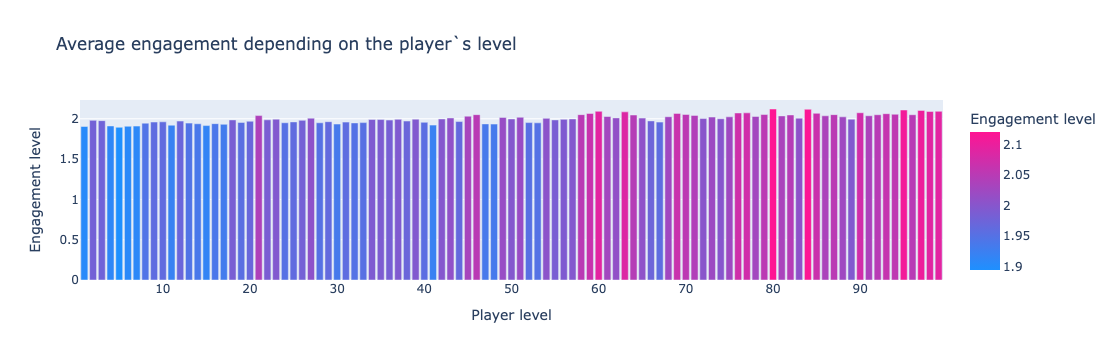

In [12]:
import pandas as pd
import plotly.express as px

df_filtered = train_df[['PlayerLevel', 'EngagementLevel']].dropna()

engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

df_filtered['EngagementLevel'] = df_filtered['EngagementLevel'].map(engagement_mapping)

level_engagement = df_filtered.groupby('PlayerLevel')['EngagementLevel'].mean().reset_index()

max_engagement = level_engagement['EngagementLevel'].max()

max_engagement_level = level_engagement[level_engagement['EngagementLevel'] == max_engagement]

print(f"Maximum average engagement: {max_engagement}")
print(f"The level of the player with maximum engagement: {max_engagement_level['PlayerLevel'].values[0]}")

custom_colorscale = ['#1E90FF', '#FF1493']
fig = px.bar(level_engagement, 
             x='PlayerLevel', 
             y='EngagementLevel', 
             title= 'Average engagement depending on the player`s level' , 
             labels={'PlayerLevel': 'Player level', 'EngagementLevel': 'Engagement level'},
             color='EngagementLevel',
             color_continuous_scale = custom_colorscale)

fig.show()

#### According to the results of the study, it turned out that the most involved people are at level 80, I think in most games this is the golden mean, after which interest in the game slowly begins to fade

## 3. Preference of game genres depending on age and gender

#### I have always been interested in the topic of choosing games based on gender and age. I have suggested that young men are more likely to choose action games and shooters, while women are more likely to choose casual games, simulators and role-playing games. With age, there is an increase in interest in strategies, puzzles and games that require long-term planning, both among men and women.

In [39]:
import pandas as pd

bins = [15, 20, 25, 30, 35, 40, 45, 50]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-50']

if len(bins) - 1 != len(labels):
    raise ValueError({len(labels)}, {len(bins)})

train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

genre_by_age_gender = train_df.groupby(['AgeGroup', 'Gender', 'GameGenre']).size().reset_index(name='Count')

print("Preference of game genres depending on age and gender:")
print(genre_by_age_gender)

Preference of game genres depending on age and gender:
   AgeGroup  Gender   GameGenre  Count
0     15-19  Female      Action    429
1     15-19  Female         RPG    494
2     15-19  Female  Simulation    447
3     15-19  Female      Sports    479
4     15-19  Female    Strategy    458
..      ...     ...         ...    ...
65    45-50    Male      Action    632
66    45-50    Male         RPG    627
67    45-50    Male  Simulation    698
68    45-50    Male      Sports    648
69    45-50    Male    Strategy    667

[70 rows x 4 columns]


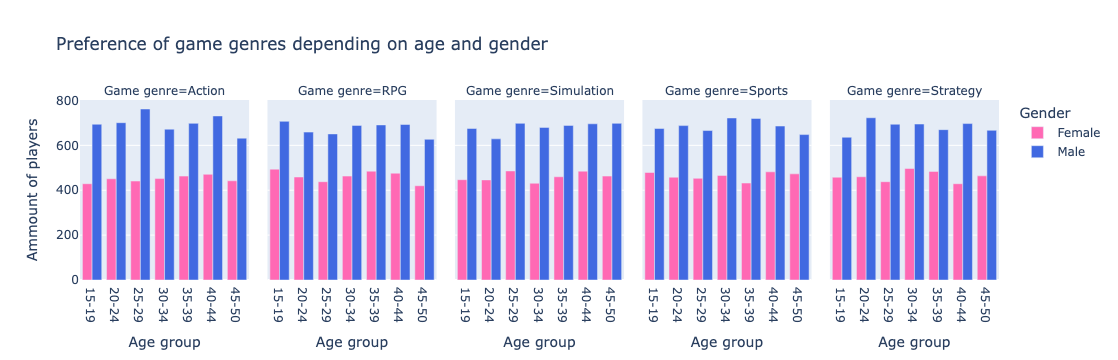

In [40]:
import plotly.express as px

fig = px.bar(genre_by_age_gender, 
             x = 'AgeGroup', 
             y = 'Count', 
             color = 'Gender', 
             facet_col = 'GameGenre', 
             barmode = 'group', 
             labels = {'AgeGroup': 'Age group', 'Count': 'Ammount of players', 'Gender': 'Gender', 'GameGenre': 'Game genre'},
             title = "Preference of game genres depending on age and gender",
            color_discrete_map={'Female': '#FF69B4', 'Male': '#4169E1'})

fig.show()

#### As a result, it turned out that men aged 25-29 play action games the most, while women play this genre the most at the age of 40-45. Regarding the rpg genre, both women and men play the most at the age of 15-19 years. The simulation is mainly played by men aged 25-29 and 45-50 (the values are identical), while women are mainly 25-29 and 40-44. The genre of sports is played in large numbers by men 30-39 years old and women 40-44 years old. Contrary to my assumptions, the strategy genre is preferred by men 20-24 years old and women 30-34 years old